# PRIMEIRA AVALIAÇÃO DE ECONOMETRIA

## Passos Iniciais

### Importar as bibliotecas

In [1]:
# Análise de dados básica

import pandas as pd
import numpy as np

# Visualização

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Econometria

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

# Estatística

from scipy import stats

### Formatação do display do dataframe

In [2]:
# O pandas foi configurado para mostrar todas as colunas e as 100 primeiras linhas

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 10)     

### Importando a base da RAIS 2021

In [4]:
# O arquivo CSV foi transformado em um dataframe

df = pd.read_csv("rais_firma_2021_aula.csv", encoding='UTF-8')  

# Criar a coluna com o quadrado da idade_med

df['idade_med_quadrado'] = df['idade_med'] ** 2

# Criar interação entre sexo e raça/cor (se forem numéricas). Se forem categóricas, primeiro crie dummies

df['sexo_raca_interacao'] = df['sexo_med'] * df['raca_cor_med']

# Versão alternativa com get_dummies

dummies = pd.get_dummies(df['nivel_tec'], prefix='nivel_tec')
dummies = dummies[[f'nivel_tec_{i}' for i in range(1, 6)]]  # Remove o nível 0
df = pd.concat([df, dummies], axis=1)

# Convertendo as dummies em inteiros

for nivel in range(1, 6):
    df[f'nivel_tec_{nivel}'] = (df['nivel_tec'] == nivel).astype(int)

### Display dos dados

In [ ]:
# Mostra as 10 primeiras linhas do dataframe

display(df) 

,sexo_med,raca_cor_med,tempo_emprego_med,idade_med,remun_med_real_med,hb_med,hn_med,mb_med,mn_med,envelhecidos_med,adultos_med,jovens_med,ate_fundamental_med,superior_med,rotatividade_med,mismatchover_med,mismatchunder_med,mismatchnull_med,tempo_emprego_a1_med,tempo_emprego_2a5_med,tempo_emprego_6mais_med,sal_hora_med,hierq_cbo_a_med,hierq_cbo_b_med,hierq_cbo_c_med,hierq_cbo_d_med,hierq_cbo_e_med,hierq_cbo_f_med,hierq_cbo_g_med,hierq_cbo_h_med,hierq_cbo_i_med,hierq_cbo_j_med,jornmeno30_med,sal_hora_dp,produtividade,data_abertura,data_encerramento,municipio,natureza_juridica,qtd_vinc_atv,ibge_subset,ind_atv_ano,cnae_20,nivel_tec,tamanho,idade,idade_med_quadrado,sexo_raca_interacao,nivel_tec_1,nivel_tec_2,nivel_tec_3,nivel_tec_4,nivel_tec_5
0,0.00,0.00,57.900,54.000000,2398.300,1.000000,0.00,0.000000,0.0,0.000000,1.000000,0.0,1.00,0.0,0.0,1.00,0.0,0.00,0.00,1.00,0.0,13.626705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.0,NaN,54.506818,0,0,315250,4081,1,25,1,1,1,2,NaN,2916.000000,0.0000,1,0,0,0,0
1,0.20,0.50,7.500,35.200000,2289.444,0.333333,0.50,0.166667,0.0,0.200000,0.100000,0.7,0.20,0.0,0.1,0.50,0.0,0.50,0.90,0.10,0.0,13.008205,0.0,0.0,0.2,0.3,0.1,0.0,0.0,0.30,0.10,0.0,0.0,5.695288,52.032818,0,0,314980,4120,5,25,1,1,1,2,NaN,1239.040000,0.1000,1,0,0,0,0
2,1.00,0.00,103.900,40.000000,1130.550,0.000000,0.00,1.000000,0.0,0.000000,1.000000,0.0,0.00,0.0,0.0,0.00,0.0,1.00,0.00,0.00,1.0,7.065938,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.0,0.0,NaN,28.263750,0,0,261330,4081,1,19,1,69,2,2,NaN,1600.000000,0.0000,0,1,0,0,0
3,0.00,0.00,57.200,64.000000,1003.750,1.000000,0.00,0.000000,0.0,1.000000,0.000000,0.0,0.00,0.0,0.0,0.00,0.0,1.00,0.00,1.00,0.0,5.703125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.0,NaN,22.812500,0,0,314810,4120,0,25,1,1,1,2,NaN,4096.000000,0.0000,1,0,0,0,0
4,0.25,0.25,13.825,33.500000,1352.515,0.500000,0.25,0.250000,0.0,0.000000,0.500000,0.5,0.25,0.0,0.0,0.25,0.0,0.75,0.75,0.25,0.0,7.684744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.25,0.0,0.0,1.721219,30.738977,0,0,310380,4081,3,25,1,1,1,2,NaN,1122.250000,0.0625,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575868,1.00,0.00,160.900,61.000000,1514.940,0.000000,0.00,1.000000,0.0,1.000000,0.000000,0.0,1.00,0.0,0.0,1.00,0.0,0.00,0.00,0.00,1.0,8.607614,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.0,0.0,NaN,34.430455,0,0,521150,4120,1,25,1,1,1,2,NaN,3721.000000,0.0000,1,0,0,0,0
2575869,0.00,0.00,40.900,40.000000,2075.000,1.000000,0.00,0.000000,0.0,0.000000,1.000000,0.0,1.00,0.0,0.0,1.00,0.0,0.00,0.00,1.00,0.0,11.789773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.0,NaN,47.159091,0,0,316960,4120,1,25,1,1,1,2,NaN,1600.000000,0.0000,1,0,0,0,0
2575870,0.00,1.00,46.500,61.000000,1080.440,0.000000,1.00,0.000000,0.0,1.000000,0.000000,0.0,1.00,0.0,0.0,1.00,0.0,0.00,0.00,1.00,0.0,6.138864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.0,NaN,24.555455,0,0,311430,4120,0,25,1,1,1,2,NaN,3721.000000,0.0000,1,0,0,0,0
2575871,0.00,0.00,196.900,52.333333,1916.540,1.000000,0.00,0.000000,0.0,0.333333,0.666667,0.0,1.00,0.0,0.0,1.00,0.0,0.00,0.00,0.00,1.0,10.889432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.0,1.097719,43.557727,0,0,411700,4120,3,25,1,1,1,2,NaN,2738.777778,0.0000,1,0,0,0,0


## Análise 

### Descrição das variáveis

#### Descrição da variável explicada (remuneração média real da firma)

Descrição da variável Y (remuneração média real da firma)
 
count    2.575873e+06
mean     1.694868e+03
std      1.305140e+03
min      0.000000e+00
25%      1.184857e+03
50%      1.455021e+03
75%      1.863400e+03
max      1.457806e+05
Name: remun_med_real_med, dtype: float64


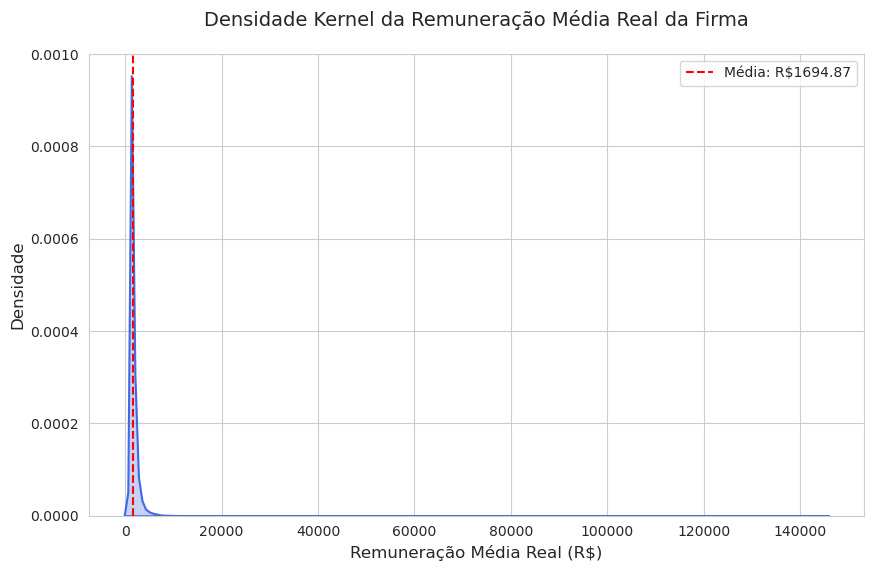

In [5]:
# Mostra uma descrição da variável dependente utilizada nas regressões ('remun_med_real_med')

print('===========================================================')
print('Descrição da variável Y (remuneração média real da firma)')
print(' ' \
'')
print(df['remun_med_real_med'].describe())
print('==========================================================')

# Plotando o gráfico de densidade kernel da variável Y (Remuneração média real da firma)

# Configurar o estilo do gráfico

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Criar o gráfico de densidade Kernel (KDE)

sns.kdeplot(
    data=df,
    x='remun_med_real_med',
    color='royalblue',
    fill=True,
    alpha=0.3,  # Transparência do preenchimento
    linewidth=1.5  # Espessura da linha
)

# Adicionar título e labels

plt.title('Densidade Kernel da Remuneração Média Real da Firma', fontsize=14, pad=20)
plt.xlabel('Remuneração Média Real (R$)', fontsize=12)
plt.ylabel('Densidade', fontsize=12)

# Adicionar linha da média

media = df['remun_med_real_med'].mean()
plt.axvline(media, color='red', linestyle='--', label=f'Média: R${media:.2f}')
plt.legend()

# Mostrar o gráfico

plt.show()

#### Descrição da variável explicativa idade média dos trabalhadores da firma

Descrição da variável X (idade média na firma)
 
count    2.575873e+06
mean     3.575006e+01
std      9.192819e+00
min      1.800000e+01
25%      2.900000e+01
50%      3.466667e+01
75%      4.100000e+01
max      7.500000e+01
Name: idade_med, dtype: float64


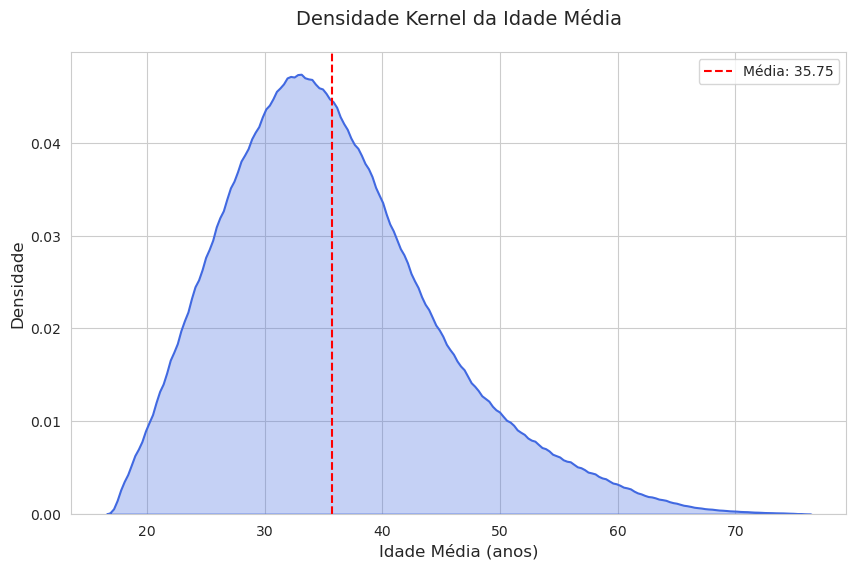

In [7]:

# Mostra uma descrição da variável independente utilizada nas regressões ('idade_med')

print('================================================')
print('Descrição da variável X (idade média na firma)')
print(' ' \
'')
print(df['idade_med'].describe())
print('===============================================')

# Platando o gráfico de densidade kernel da variável idade média

# Configurar o estilo do gráfico

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Criar o gráfico de densidade Kernel (KDE)

sns.kdeplot(
    data=df,
    x='idade_med',
    color='royalblue',
    fill=True,
    alpha=0.3,  # Transparência do preenchimento
    linewidth=1.5  # Espessura da linha
)

# Adicionar título e labels

plt.title('Densidade Kernel da Idade Média', fontsize=14, pad=20)
plt.xlabel('Idade Média (anos)', fontsize=12)
plt.ylabel('Densidade', fontsize=12)

# Adicionar linha da média
media = df['idade_med'].mean()
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.legend()

# Mostrar o gráfico
plt.show()

#### Descrição da variável explicativa proporção de ensino superior dos trabalhadores da firma

Descrição da variável X (proporção de ensino superior ou mais na firma)
 
count    2.575873e+06
mean     1.033806e-01
std      2.336733e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.882353e-02
max      1.000000e+00
Name: superior_med, dtype: float64


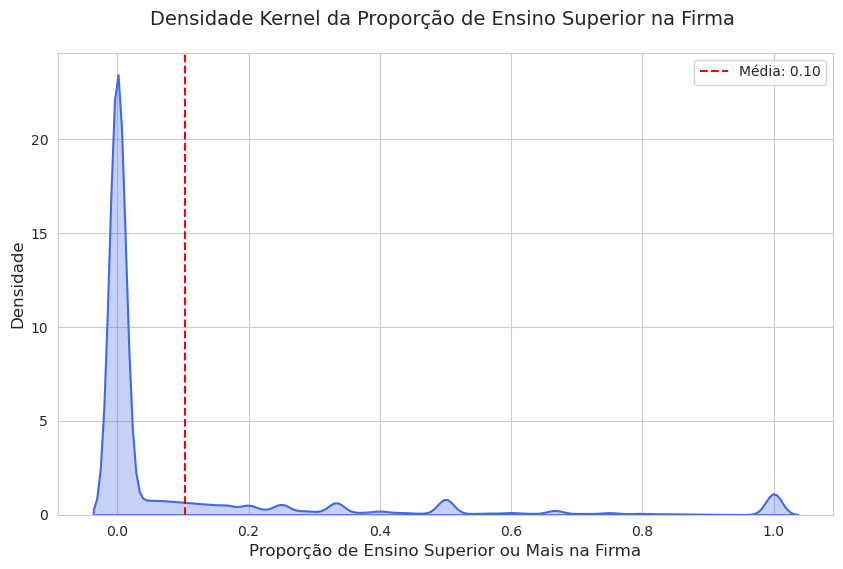

In [ ]:
# Mostra uma descrição da variável independente utilizada nas regressões ('superior_med')

print('========================================================================')
print('Descrição da variável X (proporção de ensino superior ou mais na firma)')
print(' ' \
'')
print(df['superior_med'].describe())
print('=======================================================================')

# Platando o gráfico de densidade kernel da variável Y (Proporção de ensino superior ou mais na firma)

# Configurar o estilo do gráfico

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Criar o gráfico de densidade Kernel (KDE)

sns.kdeplot(
    data=df,
    x='superior_med',
    color='royalblue',
    fill=True,
    alpha=0.3,  # Transparência do preenchimento
    linewidth=1.5  # Espessura da linha
)

# Adicionar título e labels

plt.title('Densidade Kernel da Proporção de Ensino Superior na Firma ', fontsize=14, pad=20)
plt.xlabel('Proporção de Ensino Superior ou Mais na Firma', fontsize=12)
plt.ylabel('Densidade', fontsize=12)

# Adicionar linha da média

media = df['superior_med'].mean()
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.legend()

# Mostrar o gráfico

plt.show()

#### Descrição da variável explicativa proporção de mulheres da firma

Descrição da variável X3 (proporção de mulheres na firma)
 
count    2.575873e+06
mean     4.634875e-01
std      4.002703e-01
min      0.000000e+00
25%      0.000000e+00
50%      4.461538e-01
75%      9.821429e-01
max      1.000000e+00
Name: sexo_med, dtype: float64


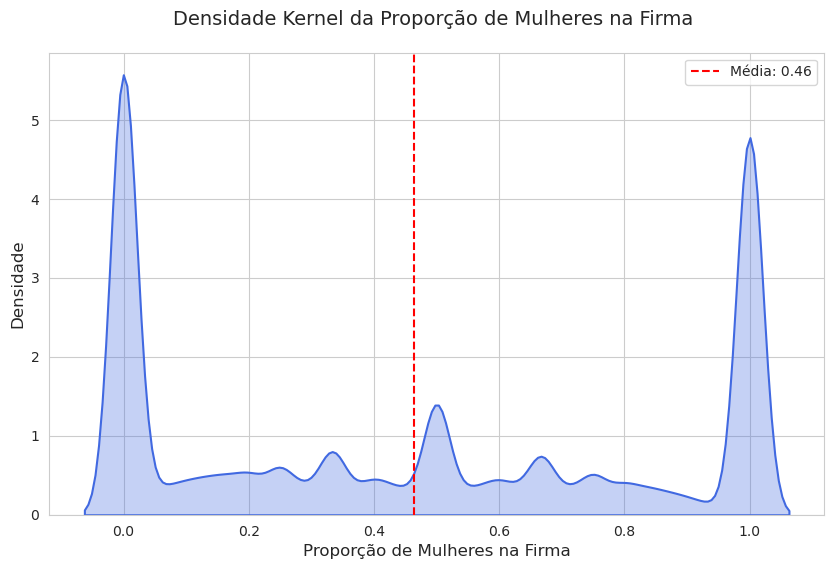

In [ ]:
# Mostra uma descrição da variável dependente utilizada nas regressões ('sexo_med')

print('========================================================================')
print('Descrição da variável X (proporção de mulheres na firma)')
print(' ' \
'')
print(df['sexo_med'].describe())
print('=======================================================================')

# Platando o gráfico de densidade kernel da variável Y (Proporção de ensino superior ou mais na firma)

# Configurar o estilo do gráfico

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Criar o gráfico de densidade Kernel (KDE)

sns.kdeplot(
    data=df,
    x='sexo_med',
    color='royalblue',
    fill=True,
    alpha=0.3,  # Transparência do preenchimento
    linewidth=1.5  # Espessura da linha
)

# Adicionar título e labels

plt.title('Densidade Kernel da Proporção de Mulheres na Firma ', fontsize=14, pad=20)
plt.xlabel('Proporção de Mulheres na Firma', fontsize=12)
plt.ylabel('Densidade', fontsize=12)

# Adicionar linha da média

media = df['sexo_med'].mean()
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.legend()

# Mostrar o gráfico

plt.show()

#### Descrição da variável explicativa proporção de negros na firma

Descrição da variável X (proporção de negros na firma)
 
count    2.200281e+06
mean     4.121330e-01
std      4.146033e-01
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e-01
75%      9.189189e-01
max      1.000000e+00
Name: raca_cor_med, dtype: float64


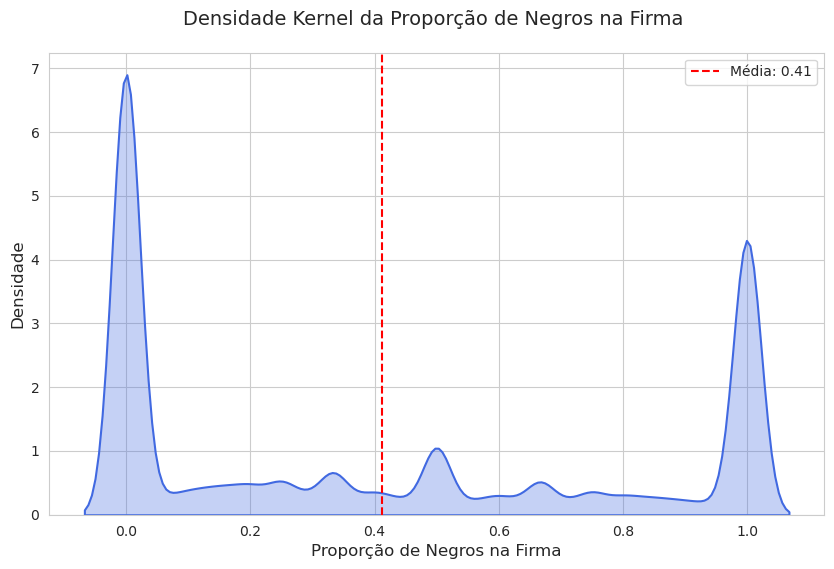

In [10]:
# Mostra uma descrição da variável dependente utilizada nas regressões ('raca_cor_med')

print('========================================================================')
print('Descrição da variável X (proporção de negros na firma)')
print(' ' \
'')
print(df['raca_cor_med'].describe())
print('=======================================================================')

# Configurar o estilo do gráfico

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Criar o gráfico de densidade Kernel (KDE)

sns.kdeplot(
    data=df,
    x='raca_cor_med',
    color='royalblue',
    fill=True,
    alpha=0.3,  # Transparência do preenchimento
    linewidth=1.5  # Espessura da linha
)

# Adicionar título e labels

plt.title('Densidade Kernel da Proporção de Negros na Firma ', fontsize=14, pad=20)
plt.xlabel('Proporção de Negros na Firma', fontsize=12)
plt.ylabel('Densidade', fontsize=12)

# Adicionar linha da média

media = df['raca_cor_med'].mean()
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.legend()

# Mostrar o gráfico

plt.show()

#### Descrição da variável explicativa nível técnico da firma

Descrição da variável X (nivel técnico da firma)
 
count    2.575873e+06
mean     7.851090e-01
std      8.622532e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      5.000000e+00
Name: nivel_tec, dtype: float64


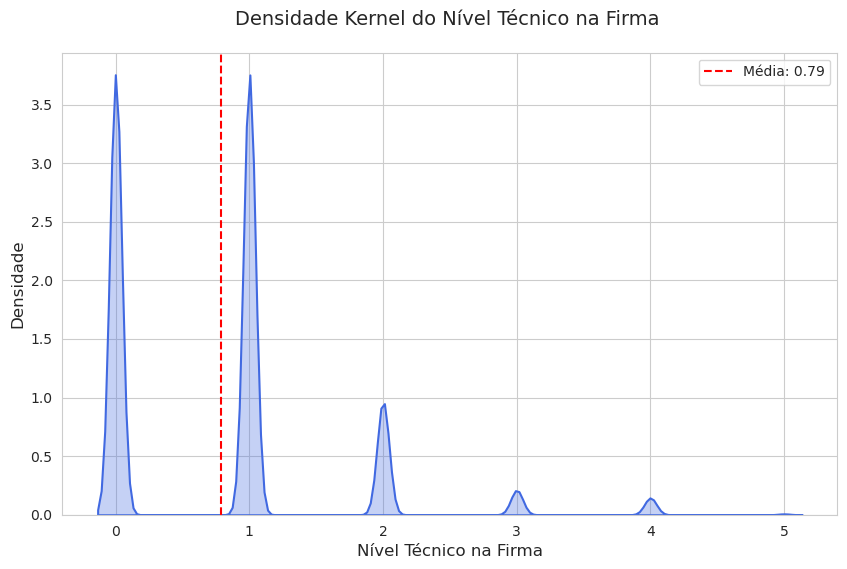

In [11]:
# Mostra uma descrição da variável dependente utilizada nas regressões ('nivel_tec')

print('========================================================================')
print('Descrição da variável X (nivel técnico da firma)')
print(' ' \
'')
print(df['nivel_tec'].describe())
print('=======================================================================')

# Configurar o estilo do gráfico

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Criar o gráfico de densidade Kernel (KDE)

sns.kdeplot(
    data=df,
    x='nivel_tec',
    color='royalblue',
    fill=True,
    alpha=0.3,  # Transparência do preenchimento
    linewidth=1.5  # Espessura da linha
)

# Adicionar título e labels

plt.title('Densidade Kernel do Nível Técnico na Firma ', fontsize=14, pad=20)
plt.xlabel('Nível Técnico na Firma', fontsize=12)
plt.ylabel('Densidade', fontsize=12)

# Adicionar linha da média

media = df['nivel_tec'].mean()
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.legend()

# Mostrar o gráfico
plt.show()

### Analisando modelos

#### remuneção média real da firma = const + proporção de ensino superior ou mais

                            OLS Regression Results                            
Dep. Variable:     remun_med_real_med   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                 3.884e+04
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:27:36   Log-Likelihood:            -2.1989e+07
No. Observations:             2575873   AIC:                         4.398e+07
Df Residuals:                 2575871   BIC:                         4.398e+07
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1505.9328      0.592   2544.384   

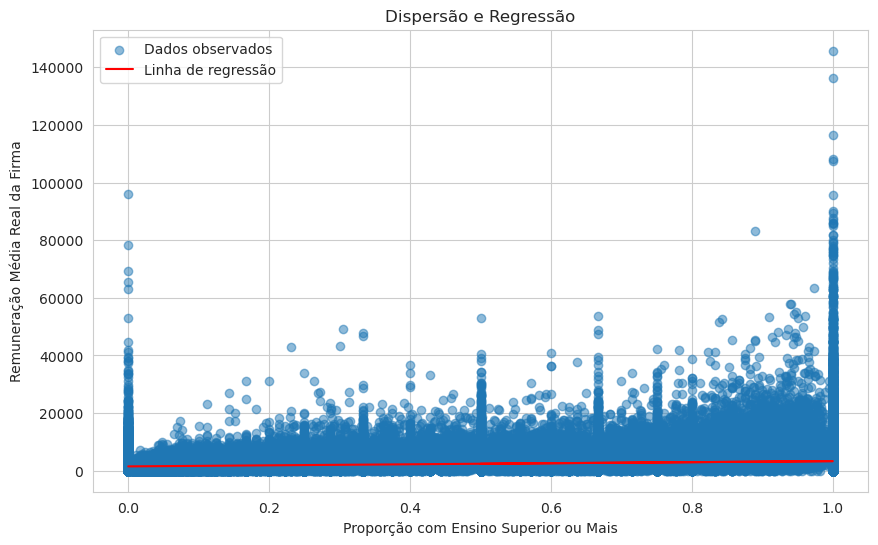

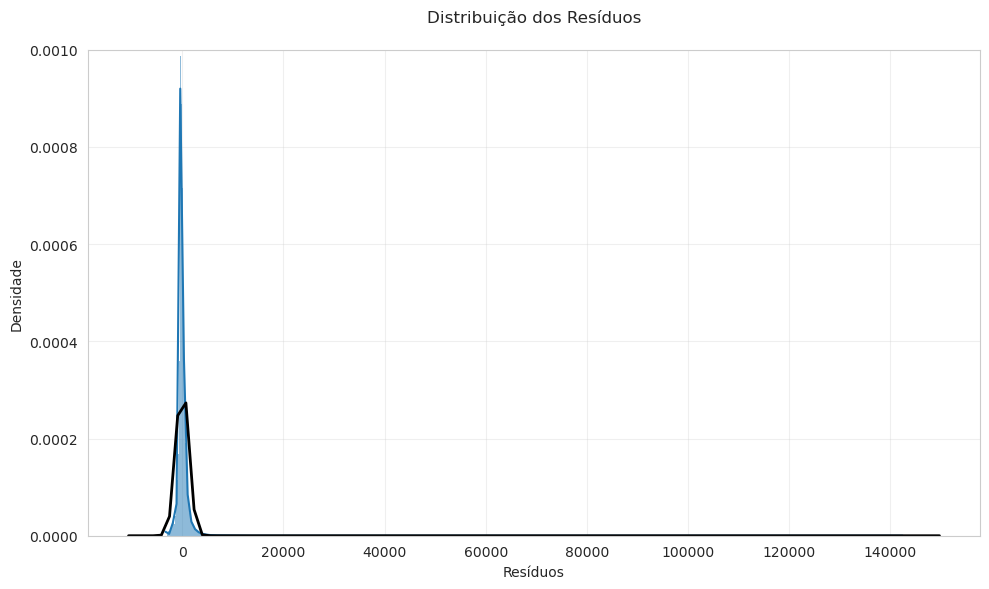

In [ ]:
# Selecionar variáveis e remover missing values

dados = df[['remun_med_real_med', 'superior_med']].dropna()
X = dados['superior_med']  # Variável independente
y = dados['remun_med_real_med']  # Variável dependente

# Adicionar constante (intercepto) ao modelo

X = sm.add_constant(X)  # X agora tem duas colunas: [const, superior_med]

# Ajustar o modelo

modelo = sm.OLS(y, X).fit(cov_type='HC3')  # O modelo foi estimado com erros-padrão robustos

# Resultados da regressão

print(modelo.summary())

# Gráfico de dispersão com linha de regressão

plt.figure(figsize=(10, 6))
plt.scatter(X['superior_med'], y, alpha=0.5, label='Dados observados')
plt.plot(X['superior_med'], modelo.predict(), color='red', label='Linha de regressão')
plt.title('Dispersão e Regressão')
plt.xlabel('Proporção com Ensino Superior ou Mais')
plt.ylabel('Remuneração Média Real da Firma')
plt.legend()
plt.grid(True)
plt.show()

# Dados do modelo

residuos = modelo.resid

# Configuração do gráfico

plt.figure(figsize=(10, 6))
ax = sns.histplot(residuos, kde=True, stat="density", linewidth=0)

# Adicionar curva normal

mu, std = stats.norm.fit(residuos)
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Ajustar limites do eixo Y

plt.ylim(0, 0.0010)  # Fixa o eixo Y entre 0 e 0.0010

# Configurações adicionais

plt.title('Distribuição dos Resíduos', pad=20)
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Plot do gráfico

plt.show()

#### remuneção média real da firma = const + idade média

                            OLS Regression Results                            
Dep. Variable:     remun_med_real_med   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                 2.846e+04
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:30:03   Log-Likelihood:            -2.2115e+07
No. Observations:             2575873   AIC:                         4.423e+07
Df Residuals:                 2575871   BIC:                         4.423e+07
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1068.9382      3.321    321.832      0.0

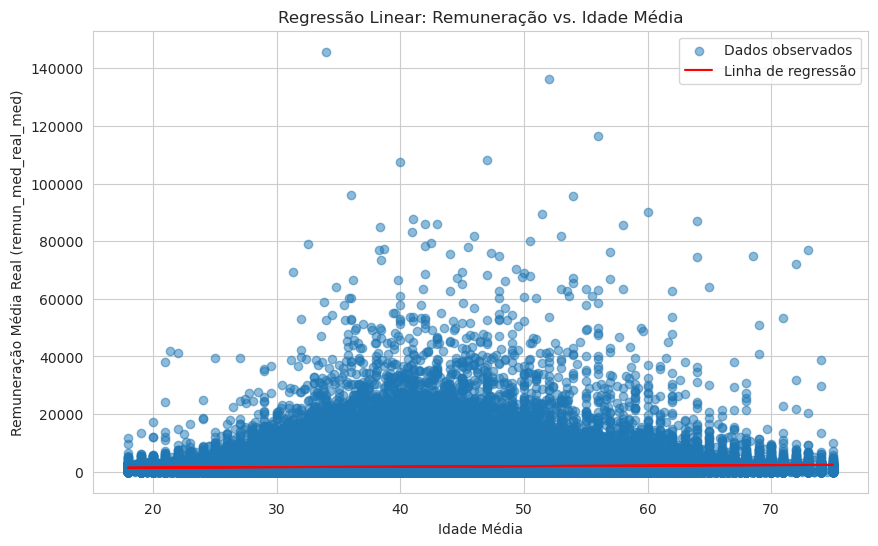

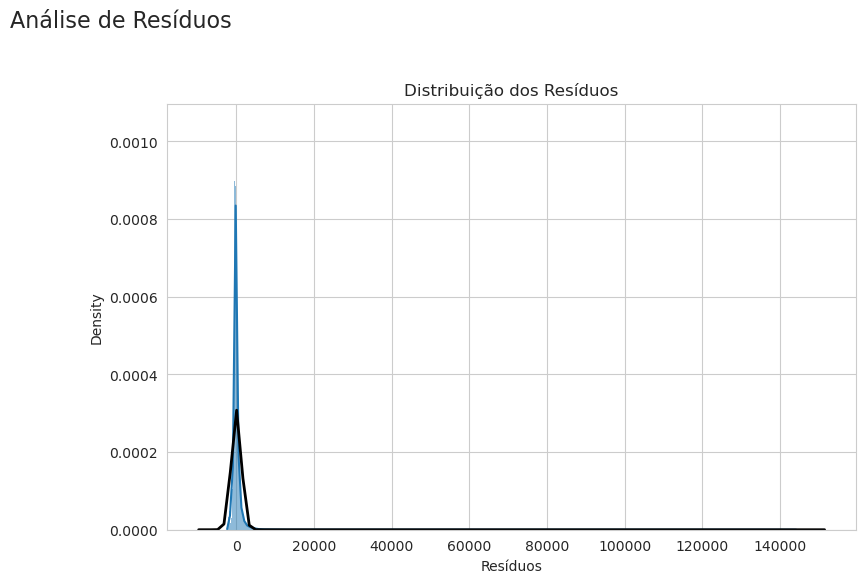

In [13]:
# Selecionar variáveis e remover missing values

dados = df[['remun_med_real_med', 'idade_med']].dropna()
X = dados['idade_med']  # Variável independente
y = dados['remun_med_real_med']  # Variável dependente

# Adicionar constante (intercepto) ao modelo

X = sm.add_constant(X)  # X agora tem duas colunas: [const, idade_med]

# Ajustar o modelo

modelo = sm.OLS(y, X).fit(cov_type='HC3')  # O modelo foi estimado com erros-padrão robustos

# Resultados da regressão

print(modelo.summary())

# Gráfico de dispersão com linha de regressão

plt.figure(figsize=(10, 6))
plt.scatter(X['idade_med'], y, alpha=0.5, label='Dados observados')
plt.plot(X['idade_med'], modelo.predict(), color='red', label='Linha de regressão')
plt.title('Regressão Linear: Remuneração vs. Idade Média')
plt.xlabel('Idade Média')
plt.ylabel('Remuneração Média Real (remun_med_real_med)')
plt.legend()
plt.grid(True)
plt.show()

# Dados do seu modelo

residuos = modelo.resid
valores_ajustados = modelo.predict()

# Configuração do layout dos gráficos

plt.figure(figsize=(15, 10))
plt.suptitle('Análise de Resíduos', y=1.02, fontsize=16)

# Gráfico 1: Histograma + Distribuição Normal

plt.subplot(2, 2, 2)
sns.histplot(residuos, kde=True, stat="density", linewidth=0)
mu, std = stats.norm.fit(residuos)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.grid(True)
plt.tight_layout()

# Plot do gráfico

plt.show()

#### remuneção média real da firma = const + idade média + proporção de ensino superior ou mais

                            OLS Regression Results                            
Dep. Variable:     remun_med_real_med   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                 2.372e+04
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:36:18   Log-Likelihood:            -2.1969e+07
No. Observations:             2575873   AIC:                         4.394e+07
Df Residuals:                 2575870   BIC:                         4.394e+07
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          923.6424      3.531    261.581   

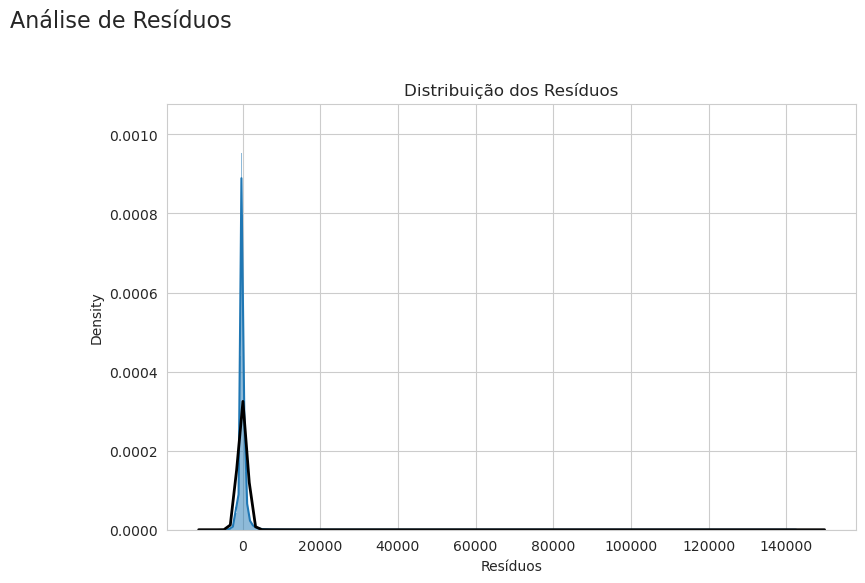

In [16]:
# Selecionar variáveis e remover missing values

dados = df[['remun_med_real_med', 'idade_med', 'superior_med']].dropna()
X = dados[['idade_med', 'superior_med']]  # Variáveis independentes
y = dados['remun_med_real_med']           # Variável dependente

# Adicionar constante (intercepto) ao modelo

X = sm.add_constant(X)

# Modelo

modelo = sm.OLS(y, X).fit(cov_type='HC3') # O modelo foi estimado com erros-padrão robustos

# Resultados da regressão

print(modelo.summary())

# Dados do seu modelo

residuos = modelo.resid
valores_ajustados = modelo.predict()

# Configuração do layout dos gráficos

plt.figure(figsize=(15, 10))
plt.suptitle('Análise de Resíduos', y=1.02, fontsize=16)

# Gráfico 1: Histograma + Distribuição Normal

plt.subplot(2, 2, 2)
sns.histplot(residuos, kde=True, stat="density", linewidth=0)
mu, std = stats.norm.fit(residuos)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.grid(True)
plt.tight_layout()

# Plotar gráfico

plt.show()

#### remuneção média real da firma = const + idade média + proporção de ensino superior ou mais + (idade média)^2

                            OLS Regression Results                            
Dep. Variable:     remun_med_real_med   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                 3.277e+04
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:37:26   Log-Likelihood:            -2.1962e+07
No. Observations:             2575873   AIC:                         4.392e+07
Df Residuals:                 2575869   BIC:                         4.392e+07
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -163.6543     10

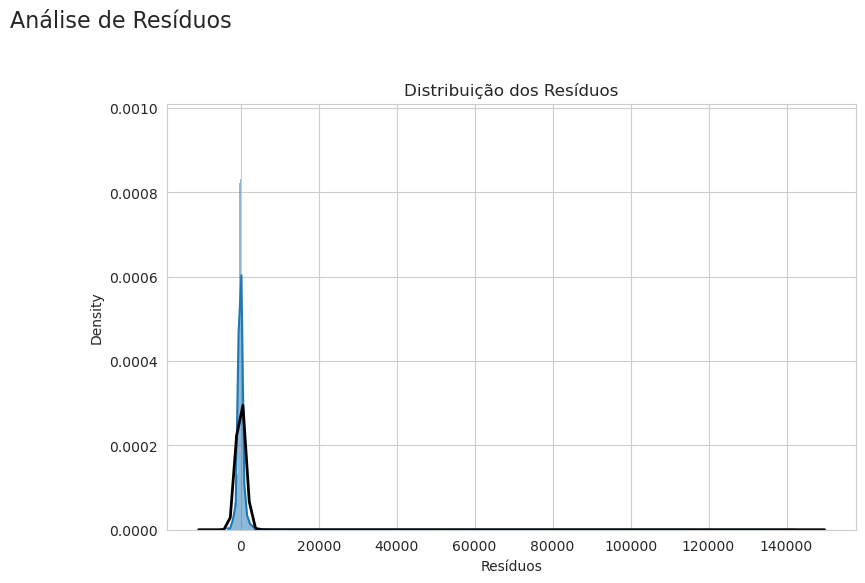

In [17]:
# Selecionar variáveis e remover missing values

dados = df[['remun_med_real_med', 'idade_med', 'superior_med', 'idade_med_quadrado']].dropna()
X = dados[['idade_med', 'superior_med', 'idade_med_quadrado']]  # Variáveis independentes
y = dados['remun_med_real_med']           # Variável dependente

# Adicionar constante (intercepto) ao modelo

X = sm.add_constant(X)

# Ajustar o modelo

modelo = sm.OLS(y, X).fit(cov_type='HC3') # O modelo foi estimado com erros-padrão robustos

# Resultados da regressão

print(modelo.summary())

# Dados do seu modelo

residuos = modelo.resid
valores_ajustados = modelo.predict()

# Configuração do layout dos gráficos

plt.figure(figsize=(15, 10))
plt.suptitle('Análise de Resíduos', y=1.02, fontsize=16)

# Gráfico 1: Histograma + Distribuição Normal

plt.subplot(2, 2, 2)
sns.histplot(residuos, kde=True, stat="density", linewidth=0)
mu, std = stats.norm.fit(residuos)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.grid(True)
plt.tight_layout()

# Plotar gráfico

plt.show()

#### remuneção média real da firma = const + idade média + proporção de ensino superior ou mais + (idade média)^2 + proporção do sexo feminino

                            OLS Regression Results                            
Dep. Variable:     remun_med_real_med   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                 2.590e+04
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:38:16   Log-Likelihood:            -2.1943e+07
No. Observations:             2575873   AIC:                         4.389e+07
Df Residuals:                 2575868   BIC:                         4.389e+07
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                148.7193     10

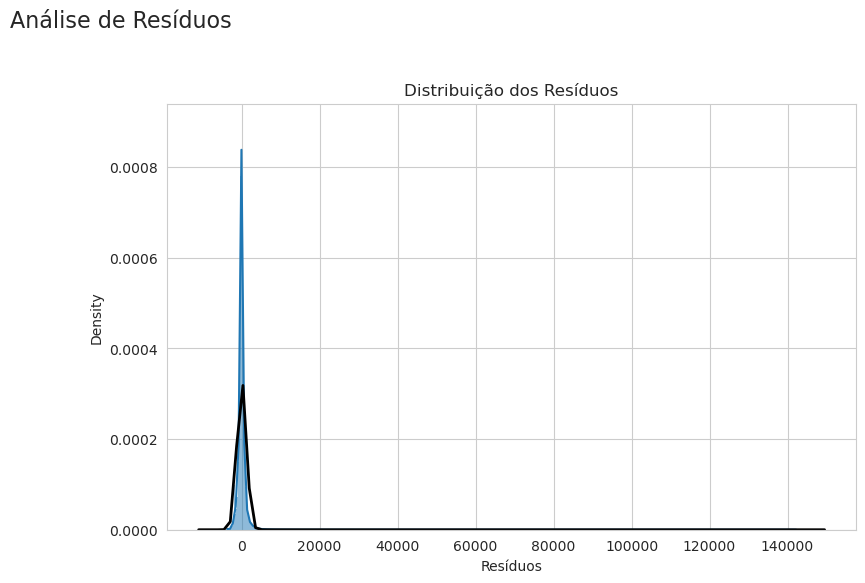

In [18]:
# Selecionar variáveis e remover missing values

dados = df[['remun_med_real_med', 'idade_med', 'superior_med', 'idade_med_quadrado', 'sexo_med']].dropna()
X = dados[['idade_med', 'superior_med', 'idade_med_quadrado', 'sexo_med']]  # Variáveis independentes
y = dados['remun_med_real_med']           # Variável dependente

# Adicionar constante (intercepto) ao modelo

X = sm.add_constant(X)

# Ajustar o modelo

modelo = sm.OLS(y, X).fit(cov_type='HC3') # O modelo foi estimado com erros-padrão robustos

# Resultados da regressão

print(modelo.summary())

# Dados do seu modelo

residuos = modelo.resid
valores_ajustados = modelo.predict()

# Configuração do layout dos gráficos

plt.figure(figsize=(15, 10))
plt.suptitle('Análise de Resíduos', y=1.02, fontsize=16)

# Gráfico 1: Histograma + Distribuição Normal

plt.subplot(2, 2, 2)
sns.histplot(residuos, kde=True, stat="density", linewidth=0)
mu, std = stats.norm.fit(residuos)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.grid(True)
plt.tight_layout()

# Plotar gráfico

plt.show()

#### remuneção média real da firma = const + idade média + proporção de ensino superior ou mais + (idade média)^2 + proporção do sexo feminino + proporção de raça parda, preta e indígena

                            OLS Regression Results                            
Dep. Variable:     remun_med_real_med   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                 1.885e+04
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:39:01   Log-Likelihood:            -1.8801e+07
No. Observations:             2200281   AIC:                         3.760e+07
Df Residuals:                 2200275   BIC:                         3.760e+07
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                185.4918     11

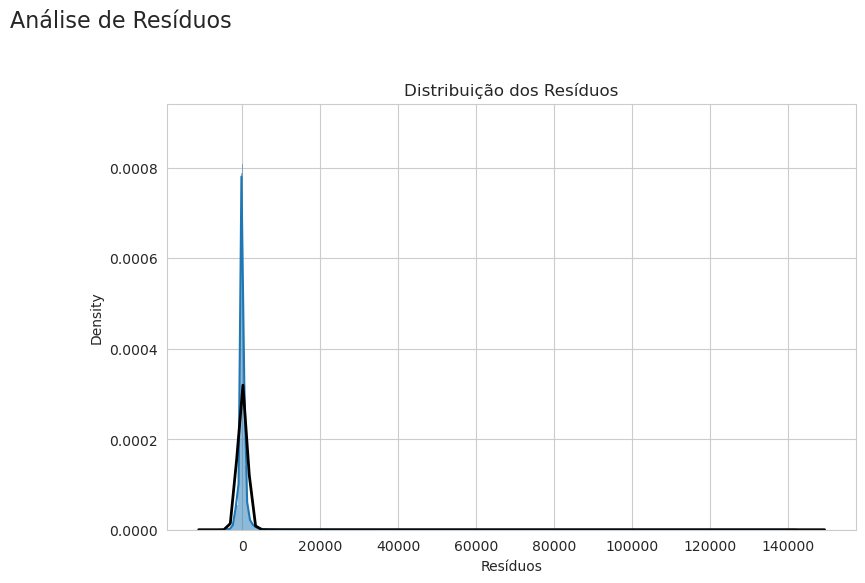

In [19]:
# Selecionar variáveis e remover missing values

dados = df[['remun_med_real_med', 'idade_med', 'superior_med', 'idade_med_quadrado', 'sexo_med', 'raca_cor_med']].dropna()
X = dados[['idade_med', 'superior_med', 'idade_med_quadrado', 'sexo_med', 'raca_cor_med']]  # Variáveis independentes
y = dados['remun_med_real_med']           # Variável dependente

# Adicionar constante (intercepto) ao modelo

X = sm.add_constant(X)

# Ajustar o modelo

modelo = sm.OLS(y, X).fit(cov_type='HC3')  # O modelo foi estimado com erros-padrão robustos

# Resultados da regressão

print(modelo.summary())

# Dados do seu modelo

residuos = modelo.resid
valores_ajustados = modelo.predict()

# Configuração do layout dos gráficos

plt.figure(figsize=(15, 10))
plt.suptitle('Análise de Resíduos', y=1.02, fontsize=16)

# Gráfico 1: Histograma + Distribuição Normal

plt.subplot(2, 2, 2)
sns.histplot(residuos, kde=True, stat="density", linewidth=0)
mu, std = stats.norm.fit(residuos)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.grid(True)
plt.tight_layout()

# Plotar gráfico

plt.show()

#### remuneção média real da firma = const + idade média + proporção de ensino superior ou mais + (idade média)^2 + proporção do sexo feminino + proporção de raça parda, preta e indígena + (proporção do sexo feminino * proporção de raça parda, preta e indígena)

                            OLS Regression Results                            
Dep. Variable:     remun_med_real_med   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                 1.650e+04
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:44:14   Log-Likelihood:            -1.8800e+07
No. Observations:             2200281   AIC:                         3.760e+07
Df Residuals:                 2200274   BIC:                         3.760e+07
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 208.4909    

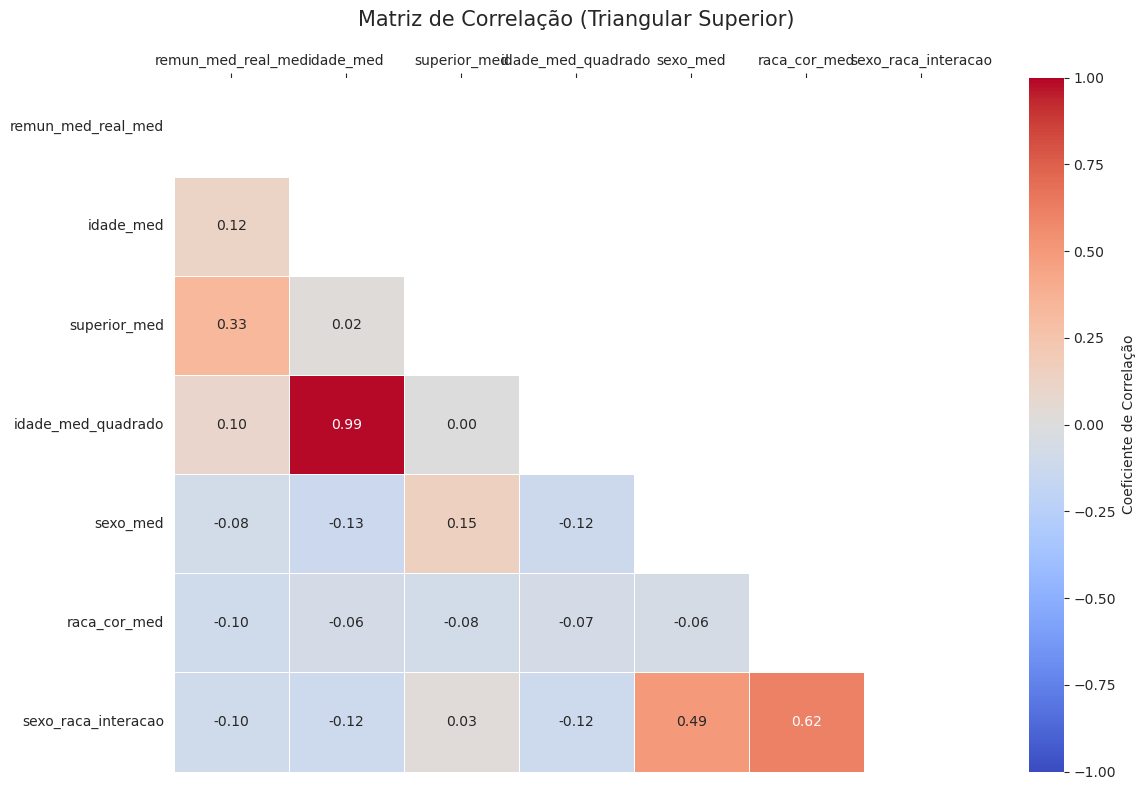


Top 5 correlações (em valor absoluto):
idade_med            idade_med_quadrado     0.986729
idade_med_quadrado   idade_med              0.986729
raca_cor_med         sexo_raca_interacao    0.616995
sexo_raca_interacao  raca_cor_med           0.616995
                     sexo_med               0.494601
dtype: float64
Esperado, uma vez que são combinações uma das outras.


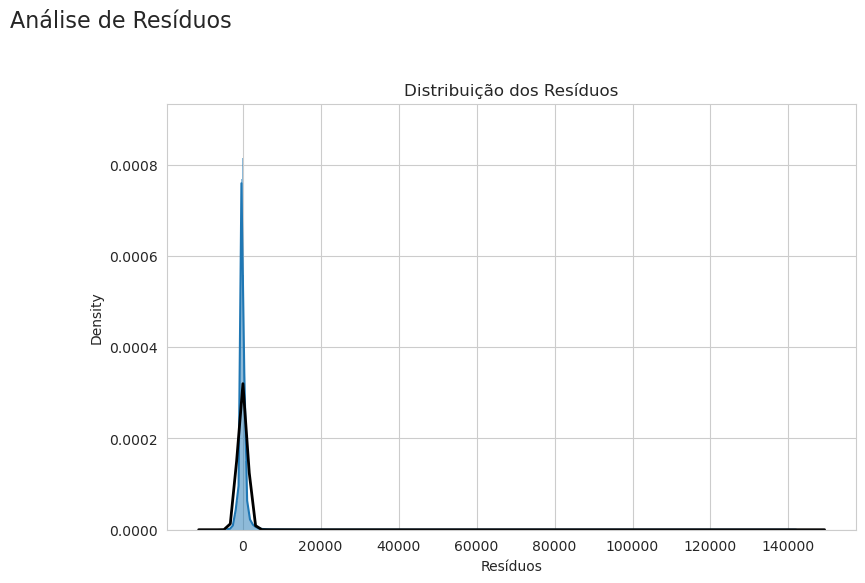

In [23]:
# Selecionar variáveis e remover missing values

dados = df[['remun_med_real_med', 'idade_med', 'superior_med', 'idade_med_quadrado', 'sexo_med', 'raca_cor_med', 'sexo_raca_interacao']].dropna()
X = dados[['idade_med', 'superior_med', 'idade_med_quadrado', 'sexo_med', 'raca_cor_med', 'sexo_raca_interacao']]  # Variáveis independentes
y = dados['remun_med_real_med']           # Variável dependente

# Adicionar constante (intercepto) ao modelo

X = sm.add_constant(X)

# Ajustar o modelo

modelo = sm.OLS(y, X).fit(cov_type='HC3')  # O modelo foi estimado com erros-padrão robustos

# Resultados da regressão

print(modelo.summary())

# Calcular VIF para cada variável

vif_data = pd.DataFrame()
vif_data["Variável"] = X.columns  # Inclui todas as variáveis independentes
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Exibir resultados

print("==============================================================================")
print("Fator de Inflação de Variância (VIF):")
print(vif_data.sort_values("VIF", ascending=False))
print("==============================================================================")

# Selecionar as variáveis

dados = df[['remun_med_real_med', 'idade_med', 'superior_med', 'idade_med_quadrado', 'sexo_med', 'raca_cor_med', 'sexo_raca_interacao']].dropna()

# 1. Calcular a matriz de correlação

corr = dados.corr()

# 2. Criar máscara para mostrar apenas o triângulo superior

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(corr, 
            mask=mask,  # Aplicar máscara
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            vmin=-1, vmax=1,
            linewidths=0.5,
            cbar_kws={'label': 'Coeficiente de Correlação'})

# Ajustar título e labels

plt.title('Matriz de Correlação (Triangular Superior)', pad=20, fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Remover valores duplicados na diagonal

plt.gca().xaxis.tick_top()  # Mover labels para cima
plt.tight_layout()

# plt.savefig('corr_triangular.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()

# 3. Opcional: Mostrar pares com maior correlação (absoluta)

print("==============================================================================")
print("\nTop 5 correlações (em valor absoluto):")
corr_unstack = corr.unstack().sort_values(key=lambda x: abs(x), ascending=False)
corr_unstack = corr_unstack[corr_unstack < 1]  # Remove autocorrelações
print(corr_unstack.head(5))
print("Esperado, uma vez que são combinações uma das outras.")
print("==============================================================================")

# Dados do seu modelo

residuos = modelo.resid
valores_ajustados = modelo.predict()

# Configuração do layout dos gráficos

plt.figure(figsize=(15, 10))
plt.suptitle('Análise de Resíduos', y=1.02, fontsize=16)

# Gráfico 1: Histograma + Distribuição Normal

plt.subplot(2, 2, 2)
sns.histplot(residuos, kde=True, stat="density", linewidth=0)
mu, std = stats.norm.fit(residuos)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.grid(True)
plt.tight_layout()

# Plotar gráfico

plt.show()

#### remuneção média real da firma = const + idade média + proporção de ensino superior ou mais + (idade média)^2 + proporção do sexo feminino + proporção de negros + (proporção do sexo feminino * proporção de raça parda, preta e indígena) + nivel_tec_1 + nivel_tec_2 + nivel_tec_3 + nivel_tec_4 + nivel_tec_5   

                            OLS Regression Results                            
Dep. Variable:     remun_med_real_med   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     9355.
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:46:40   Log-Likelihood:            -1.8793e+07
No. Observations:             2200281   AIC:                         3.759e+07
Df Residuals:                 2200269   BIC:                         3.759e+07
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 159.7945    

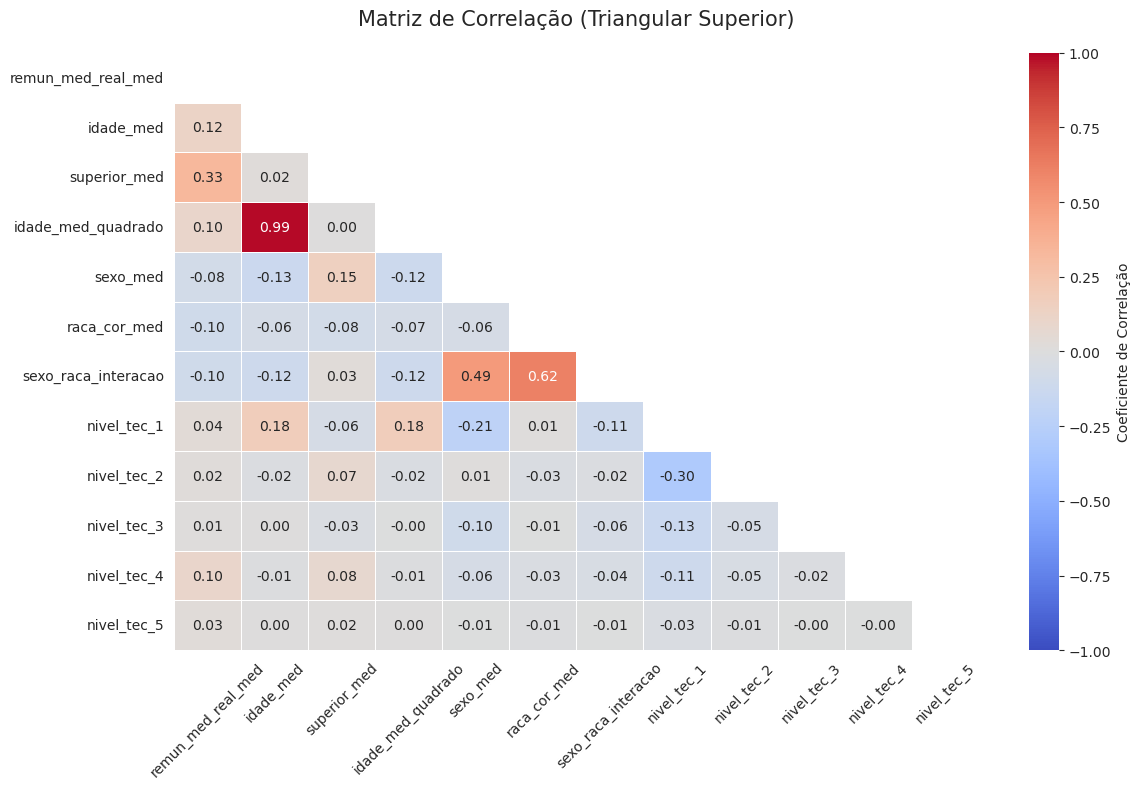

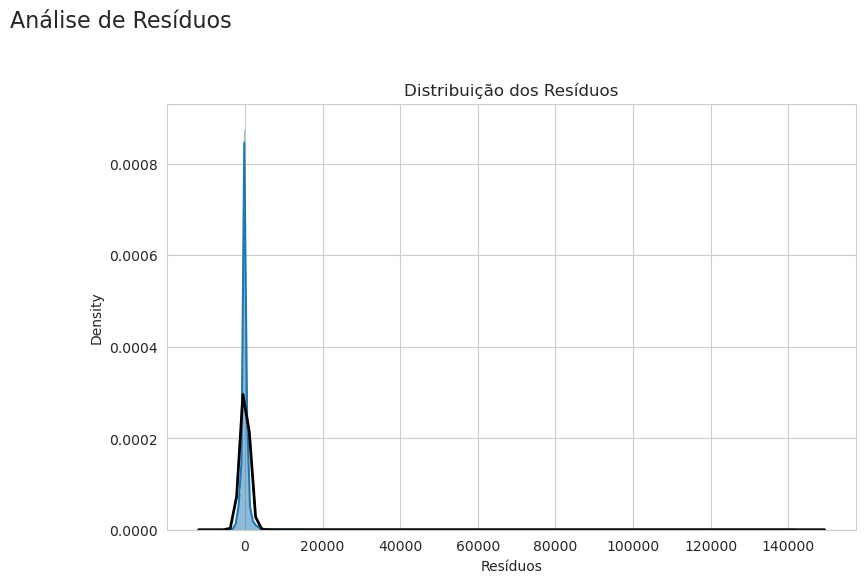

In [24]:
# Selecionar variáveis e remover missing values

dados = df[['remun_med_real_med', 'idade_med', 'superior_med', 'idade_med_quadrado', 'sexo_med', 'raca_cor_med', 'sexo_raca_interacao', 'nivel_tec_1', 'nivel_tec_2', 'nivel_tec_3', 'nivel_tec_4', 'nivel_tec_5']].dropna()
X = dados[['idade_med', 'superior_med', 'idade_med_quadrado', 'sexo_med', 'raca_cor_med', 'sexo_raca_interacao', 'nivel_tec_1', 'nivel_tec_2', 'nivel_tec_3', 'nivel_tec_4', 'nivel_tec_5']]  # Variáveis independentes
y = dados['remun_med_real_med']           # Variável dependente

# Adicionar constante (intercepto) ao modelo

X = sm.add_constant(X)

# Ajustar o modelo

modelo = sm.OLS(y, X).fit(cov_type='HC3')  # O modelo foi estimado com erros-padrão robustos

# Resultados da regressão

print(modelo.summary())

# Calcular VIF para cada variável

vif_data = pd.DataFrame()
vif_data["Variável"] = X.columns  # Inclui todas as variáveis independentes
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Exibir resultados

print("==============================================================================")
print("Fator de Inflação de Variância (VIF):")
print(vif_data.sort_values("VIF", ascending=False))
print("==============================================================================")

# 1. Calcular a matriz de correlação

corr = dados.corr()

# 2. Criar máscara triangular superior

mask = np.triu(np.ones_like(corr, dtype=bool))

# 3. Plotar o heatmap triangular

plt.figure(figsize=(12, 8))
sns.heatmap(corr, 
            mask=mask,  # Aplicar a máscara
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            vmin=-1, vmax=1,
            linewidths=0.5,
            cbar_kws={'label': 'Coeficiente de Correlação'})

# Ajustes estéticos

plt.title('Matriz de Correlação (Triangular Superior)', pad=20, fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# plt.savefig('corr_triangular_completa.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()

# Dados do seu modelo

residuos = modelo.resid
valores_ajustados = modelo.predict()

# Configuração do layout dos gráficos

plt.figure(figsize=(15, 10))
plt.suptitle('Análise de Resíduos', y=1.02, fontsize=16)

# Gráfico 1: Histograma + Distribuição Normal

plt.subplot(2, 2, 2)
sns.histplot(residuos, kde=True, stat="density", linewidth=0)
mu, std = stats.norm.fit(residuos)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.grid(True)
plt.tight_layout()

# Plotar gráfico

plt.show()